**INSTRUCTIONS**



1.  The assignment contains four questions. A few bonus questions are mentioned. 
2.   This assignment is due on **6th Feb, 23:59 **(**No Further extensions**).
3.   Assignment must be implemented in Python 3 only.
4.   You are allowed to use libraries for data preprocessing (numpy, pandas etc) and for evaluation metrics, data visualization (matplotlib etc.).
5.   You will be evaluated not just on the overall performance of the model and also on the experimentation with hyper parameters, data prepossessing techniques etc.
6.   The report file must be a well documented jupyter notebook, explaining the experiments you have performed, evaluation metrics and corresponding code. The code must run and be able to reproduce the accuracies, figures/graphs etc.
7.   For all the questions, you must create a train-validation data split and test the hyperparameter tuning on the validation set. Your jupyter notebook must reflect the same.
8.   Any attempts at **plagiarism will be penalized heavily**.
9.   Make sure you run and save your notebooks before submission.
10.  For question 3 of the Decision Trees section, output your model's depth first traversal into ```outputimp.txt``` and submit it along with the ipynb file.
10. Naming convention for the ipynb file is ```<roll_number>_assign1.ipynb```
11. Compress your submission files into a zip file with the naming convention: ```<roll_number>_assign1.zip``` and submit in the portal.

#**1) REGRESSION**

Please find the Diamond Price Prediction Data set https://drive.google.com/drive/folders/1qE1tm3Ke3uotTyv6SUqruI09t-AkcwRK?usp=sharing. "description.txt" contains the feature description of data, "diamonds.csv" has the data.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import os
import random

In [3]:
def give_data(to_drop):
    # To read data from diamonds.csv
    headers = ["carat",	"cut","color","clarity","depth","table","price","x","y","z"]
    data = pd.read_csv('diamonds.csv', na_values='?',    
             header=None,  names = headers) 
    data = data.reset_index(drop=True)
    data = data.iloc[1:]
    cut_dict = {'Fair':1, 'Good':2, 'Very Good':3, 'Premium':4, 'Ideal':5}
    color_dict = {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}
    clarity_dict = {'I1':1, 'SI2':2, 'SI1':3, 'VS2': 4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

    create_nums = {'cut' : cut_dict, 'clarity':clarity_dict, 'color':color_dict }

    data.replace(create_nums, inplace=True)

    data = data.astype(np.float64, copy=True)

    Y = data['price']
    Y = Y.astype(np.float64)

    data.drop(labels=to_drop, axis=1, inplace=True)
    # TRAIN TEST SPLIT
    X_train, X_test, Y_train, Y_test = train_test_split(data,  Y, test_size=0.20, random_state=40, shuffle=True)
    X_train = np.array(X_train[:30000])  # sub-sampling the data as my machine cannot handle all of it.
    Y_train = np.array(Y_train[:30000])
    X_test = np.array(X_test[:6000])
    Y_test = np.array(Y_test[:6000])
    return X_train, X_test, Y_train, Y_test

In [4]:
# ERROR METRICS
def RSME(Y, Y_hat):
    # Assumed that Y and Y_hat are one dimensional array
    print('RSME metric : ', end='')
    Y = np.array(Y)
    Y_hat = np.array(Y_hat)
    return np.sqrt(np.mean((Y - Y_hat)**2))/Y.shape[0]

def MSE(Y, Y_hat):
    # Assumed that Y and Y_hat are one dimensional array
    print('MSE metric : ', end='')
    Y = np.array(Y)
    Y_hat = np.array(Y_hat)
    return np.mean((Y - Y_hat)**2)/Y.shape[0]

def MAE(Y, Y_hat):
    # Assumed that Y and Y_hat are one dimensional array
    print('MAE metric : ', end='')
    Y = np.array(Y)
    Y_hat = np.array(Y_hat)
    return np.mean(np.abs(Y - Y_hat))/Y.shape[0]

In [5]:
def give_mean(X):
    return np.mean(X, axis=0) # take mean along columns

def give_Variance(X):
    return np.var(X, axis=0) # take variance along the columns

def covariance_matrix(X):
    return np.cov(X.T)  # gives the covariance of the columns

**KNN Regression [Diamond Price Prediction Dataset]**

1. a) Build a knn regression algorithm [using only python from scratch] to predict the price of diamonds.

In [9]:
# code for knn regression
class KNNRegression:
    def __init__(self, data=None, Y=None):
        self.data = data  # the data is preprocessed already, normalized(if it is required), etc, numpy array
        self.Y = data # numpy array
    
    def train(self, data, Y):
        self.data = data
        self.Y = Y
        
    def give_dist(self, X, Y, p=2):
        dist = np.sum(np.abs(X - Y) ** p)
        if p == 2:
            return math.sqrt(dist)
        else:
            return dist
    def dist_matrix_manhattan(self, X_test):
        num_test = X_test.shape[0]
        num_train = self.data.shape[0]
        dist_mat = np.zeros((num_test, num_train))
        for i in range(num_test):
            dist_mat[i, :] = np.sum(np.abs(self.data - X_test[i, :]), axis=1)
        return dist_mat
        
    def dist_matrix(self, X):
        dists = -2 * np.dot(X, self.data.T) + np.sum(self.data**2, axis=1) + np.sum(X**2, axis=1)[:, np.newaxis]
        return dists

    def do_regression(self, dist_mat, k, p=2):
        if p > 2 or p <= 0:
            raise NotImplementedError('p can only take two values')
        indices = np.argpartition(dist_mat, k)
        indices = indices[:, :k]
        values = np.take(self.Y, indices)
        return np.mean(values, axis=1)  # take average along the rows

In [10]:
X_train, X_test, Y_train, Y_test = give_data(['price', 'cut', 'clarity', 'color', 'depth', 'table'])
regressor = KNNRegression()
regressor.train(X_train, Y_train)
dists = regressor.dist_matrix_manhattan(X_test)
predicted = regressor.do_regression(dists, k=7)
print(predicted.shape)
print(RSME(Y_test, predicted))
r2 = r2_score(Y_test, predicted)
print('r2 score is :- {a}'.format(a=r2))

(6000,)
RSME metric : 0.24426404341630936
r2 score is :- 0.8682832208462565


1. b) Do we need to normalise data? [If so Does it make any difference?].

In [7]:
# NORMALISE DATA
mean = give_mean(X_train)
var = give_Variance(X_train)
X_train -= mean
X_train /= var
X_test -= mean
X_test /= var

regressor = KNNRegression()
regressor.train(X_train, Y_train)
dists = regressor.dist_matrix(X_test)
predicted = regressor.do_regression(dists, k=7)
print(predicted.shape)
print(RSME(Y_test, predicted))
r2 = r2_score(Y_test, predicted)
print('r2 score is :- {a}'.format(a=r2))

(6000,)
RSME metric : 0.24673852650742942
r2 score is :- 0.8656010263045751


#### Answer
Yes, it generally helps, but in this specific example it does not make much difference.

For classification/Regression algorithms like **KNN**, we measure the **distances** between pairs of samples and these distances are influenced by the measurement units also. For example: Let’s say, we are applying KNN on a data set having 3 features.First feature ranging from 1-10, second from 1-20 and the last one ranging from 1-1000. In this case, most of the clusters will be generated based on the last feature as the difference between 1 to 10 and 1-20 are smaller as compared to 1-1000. To avoid this mis-classification or value prediction, we should normalize the feature variables.

In [8]:
# show all the experiments

print('Manhattan Distance')
dists = regressor.dist_matrix_manhattan(X_test)
predicted = regressor.do_regression(dists, k=7)
print(RSME(Y_test, predicted))
r2 = r2_score(Y_test, predicted)
print('r2 score is :- {a}'.format(a=r2))

print('Euclidean Distance')
dists = regressor.dist_matrix(X_test)
predicted = regressor.do_regression(dists, k=7)
print(RSME(Y_test, predicted))
r2 = r2_score(Y_test, predicted)
print('r2 score is :- {a}'.format(a=r2))

Manhattan Distance
RSME metric : 0.24371112382925386
r2 score is :- 0.8688788579116036
Euclidean Distance
RSME metric : 0.24673852650742942
r2 score is :- 0.8656010263045751


3. Report Mean Squared Error(MSE), Mean-Absolute-Error(MAE), R-squared (R2) score in a tabular form.

In [9]:
# report a table
r2 = r2_score(Y_test, predicted)
print('r2 score is :- {a}'.format(a=r2))
print(MAE(Y_test, predicted))
print(MSE(Y_test, predicted))

r2 score is :- 0.8656010263045751
MAE metric : 0.13947561507936507
MSE metric : 365.2794027783447


4.  a) Choose different K values (k=2,3,5,7,11,16) and experiment. Plot a graph showing R2 score vs k.

In [10]:
# plot
k_values = np.array([2, 3, 5, 7, 11, 16, 19, 23, 27, 39, 43, 47])
r2scores = []
mse = []
mae = []
for k in k_values:
    predicted = regressor.do_regression(dists, k)
    r2scores.append(r2_score(Y_test, predicted))
    mse.append(mean_squared_error(Y_test, predicted))
    mae.append(mean_absolute_error(Y_test, predicted))
r2scores = np.array(r2scores)
mae = np.array(mae)
mse = np.array(mse)

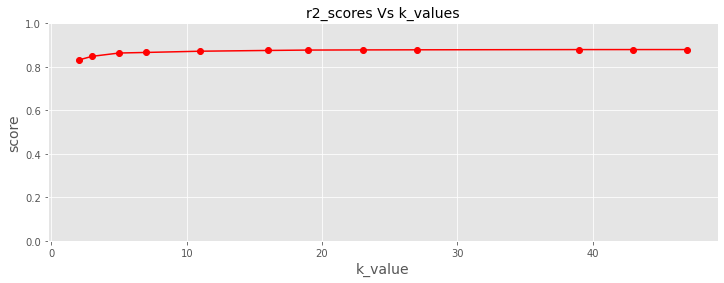

In [11]:
plt.style.use('ggplot')
plt.figure(figsize=(12, 4))
plt.plot(k_values, r2scores, color='red', marker='o')
plt.title('r2_scores Vs k_values', fontsize=14)
plt.xlabel('k_value', fontsize=14)
plt.ylabel('score', fontsize=14)
plt.grid(True)
plt.ylim(0,1)
plt.show()

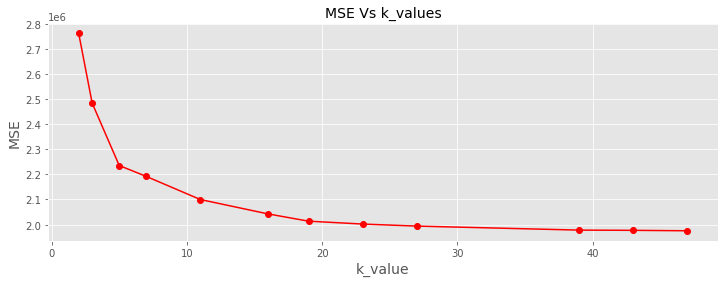

In [12]:
plt.figure(figsize=(12, 4))
plt.plot(k_values, mse, color='red', marker='o')
plt.title('MSE Vs k_values', fontsize=14)
plt.xlabel('k_value', fontsize=14)
plt.ylabel('MSE', fontsize=14)
plt.grid(True)
plt.show()

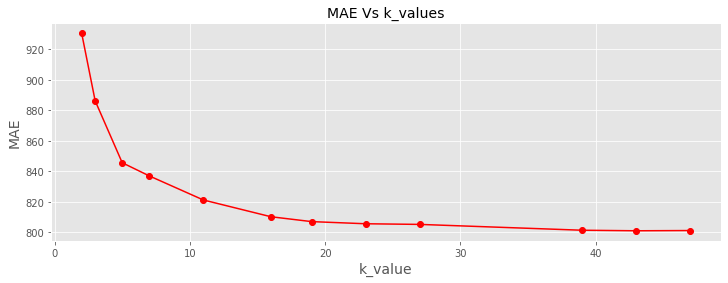

In [13]:
plt.figure(figsize=(12, 4))
plt.plot(k_values, mae, color='red', marker='o')
plt.title('MAE Vs k_values', fontsize=14)
plt.xlabel('k_value', fontsize=14)
plt.ylabel('MAE', fontsize=14)
plt.grid(True)
plt.show()

4. b) Are the R-squared scores the same? Why / Why not? How do we identify the best K? Suggest a computational procedure, with a logical explanation.

#### Explanation
The R-squared improves a little initially but remains the same after that.
This is because R-squared determines the how better our model explains the data, so when increasing K value initially, the R-squared score improves for points which were mixed up. But on taking more number of neighbours the values can be predicted with less noise as the frequency of most frequent class increases relatively compared to the other classes. This reduces noise in the prediction and improves r2_score. 

Cross Validation for best K :- we can use leave one out cross validation and take the average accuracies for each K. we can compare these values to find the best K value. other metrics can also be used instead of simple accuracy.

5. a) Also, report the performance of scikit-learn’s kNN regression algorithm.  

In [14]:
# scikit-learn KNN Regressor
nn = KNeighborsRegressor(7, p=2, weights='distance')
nn.fit(X_train, Y_train)
y_pred = nn.predict(X_test)
r2 = r2_score(Y_test, y_pred)
print('r2 score is :- {a}'.format(a=r2))
print(MAE(Y_test, y_pred))
print(MSE(Y_test, y_pred))

r2 score is :- 0.861591539658843
MAE metric : 0.14193369668312106
MSE metric : 376.17668009476074


5. b) Compare it with the algorithm you built. [ you can use complexities, R2 score etc..]

In [15]:
# Comparison
data = [[0.865, 365.279, 0.139],
       [0.861, 376.176, 0.142]]
columns = ('r2_score', 'MSE', 'MAE')
rows = ['My Model          ', 'scikit-learn model']
print('\t\t  ', end='')
for col in columns:
    print(col, end='    ')
print()
for i in range(2):
    print(rows[i], end='  ')
    for val in data[i]:
        print(val, end='  ')
    print()

		  r2_score    MSE    MAE    
My Model            0.865  365.279  0.139  
scikit-learn model  0.861  376.176  0.142  


6. From the above experiments, what do you think are advantages and disadvantages of the knn regression algorithm?  report this  along with the experiments



#### Advantages of KNN

1. No Training Period: KNN is called Lazy Learner (Instance based learning). It does not learn anything in the training period. It does not derive any discriminative function from the training data. In other words, there is no training period for it. It stores the training dataset and learns from it only at the time of making real time predictions. This makes the KNN algorithm much faster than other algorithms that require training e.g. SVM, Linear Regression etc. train function of **KNNRegression** class just stores the data. 

2. Since the KNN algorithm requires no training before making predictions, new data can be added seamlessly which will not impact the accuracy of the algorithm. we can add new data by creating another new method **add_data** which will append new data to the existing one.

3. KNN is very easy to implement. There are only two parameters required to implement KNN i.e. the value of K and the distance function (e.g. Euclidean or Manhattan etc.)

#### Disadvantages of KNN

1. Does not work well with large dataset: In large datasets, the cost of calculating the distance between the new point and each existing points is huge which degrades the performance of the algorithm. My machines hangs when the whole dataset is taken, that is the reason for considering only a subset of it.

2. Does not work well with high dimensions: The KNN algorithm doesn't work well with high dimensional data because with large number of dimensions, it becomes difficult for the algorithm to calculate the distance in each dimension. In the below Classification task KNN performs very poorly on CIFAR-10 dataset by giving around 28% accuracy.

3. Need feature scaling: We need to do feature scaling (standardization and normalization) before applying KNN algorithm to any dataset. If we don't do so, KNN may generate wrong predictions. (explanation was provided in one of the above answers)



# **2)** **Linear Regression**

Dataset - same as above (Diamond Price Detection)


2a) Implement a Linear Regression model (from the scratch) taking suitable independent variables from the dataset. 

Report and Calculate the error obtained.



In [12]:
# Linear Regression
class LinearRegression:
    def __init__(self, train_data, Y):
        self.data = train_data  # It is assumed that data is normalized and shuffled (rows, cols)
        self.Y = Y[:, np.newaxis]
        self.b = np.random.randn()
        print(self.data.shape)
        self.cols = self.data.shape[1]
        self.rows = self.data.shape[0]
        self.weights = np.random.randn(self.cols, 1)  # Initialising weights to 1, shape (cols, 1)
        self.num_iterations = 1000
        self.learning_rate = 0.0001
        self.batch_size = 100
        
    def add_column(self):
        y = np.ones(self.rows)[:, np.newaxis]
        self.data = np.hstack((self.data, y))

    def calc_mini_batches(self):
        new_data = np.hstack((self.data, self.Y))
        np.random.shuffle(new_data)
    
        rem = self.rows % self.batch_size
        num = self.rows // self.batch_size
        till = self.batch_size * num
        if num > 0:
            dd = np.array(np.vsplit(new_data[ :till, :], num))
            X_batch = dd[:, :, :-1]
            Y_batch = dd[:, :, -1]
        
        if rem != 0:
            curr_batch = new_data[till: , :]
            diff = self.batch_size - rem
            temp = np.zeros((diff, self.cols+1)) # appending with zeros so that the sizes can be matched
            curr_batch = np.concatenate((curr_batch, temp))[np.newaxis, :, :]
            if num > 0:
                X_batch = np.concatenate((X_batch, curr_batch[:, :, :-1]))
                Y_batch = np.concatenate((Y_batch, curr_batch[:, :, -1]))
            else:
                X_batch = curr_batch[:, :, :-1]
                Y_batch = curr_batch[:, :, -1]
            
        return X_batch, Y_batch

    def update_weights(self, X, Y):
        Y_Predicted = np.dot(X, self.weights) + self.b  # Remember that X has data stored along the row for one sample
        gradient = np.dot(np.transpose(X), Y_Predicted - Y)
        self.b = self.b - np.sum(Y_Predicted - Y)/(X.shape[0])
        self.weights = self.weights - (self.learning_rate * gradient)/(X.shape[0]) # vector subtraction
    
    def print_error(self):
        Y_Predicted = self.predict(self.data)
        val = np.sum((Y_Predicted - self.Y) ** 2) / self.rows
        print(val/1000)

    def gradient_descent(self):
        for j in range(self.num_iterations):
            X, Y = self.calc_mini_batches()
            num_batches = X.shape[0]
            for i in range(num_batches):
                self.update_weights(X[i, :, :], Y[i, :][:, np.newaxis])  # update the weights
            if j%20 == 0:
                self.print_error()
    
    def predict(self, X):
        # X is 2 dimensional array, samples along the rows
        return np.dot(X, self.weights) + self.b

In [13]:
X_train, X_test, Y_train, Y_test = give_data(['price'])
linear_reg = LinearRegression(X_train, Y_train)
linear_reg.gradient_descent()

(30000, 9)
13871.592543154837
3389.5556361298313
2658.3887487808734
2592.8892399568936
2494.661323514619
2535.3601492465546
3134.8185882277176
2825.4674048644833
2581.294427390458
2487.907547141201
2446.044815629971
2422.2558149137108
2606.8470281155182
2617.870022516387
2529.244099428066
2424.950512905843
3319.968403354437
2451.8492839870387
2390.483773597915
2311.393174564743
2310.0076536090082
2386.795777866108
2427.234169493706
2639.2629445863827
2281.9839162167377
2356.3577291773977
2242.8141026288517
2237.233075401514
2224.415674778949
2230.919481476948
2280.6495615544063
2356.1782086562157
2299.5730961831296
2218.6571449780326
2469.4508784061477
2163.2617882752743
2207.1032746925703
2183.2046518177694
2708.315133459153
2136.575213290511
2412.3942642846464
2129.6507400247783
2111.814277212488
2186.489308733694
2124.2392745376615
2907.376164687212
2133.775673886222
2074.3131199642407
2194.6007650523406
2154.805702171385


In [9]:
print('shape of X_train = {a}'.format(a=X_train.shape))
predicted = linear_reg.predict(X_test)
predicted = predicted.flatten()
print(RSME(Y_test, predicted))
print('r2 score : ', end='')
print(r2_score(Y_test, predicted))

shape of X_train = (30000, 9)
RSME metric : 0.2560424613852593
r2 score : 0.8552741844204133


2b) What are the best suitable features you used to predict the price of the dataset and Why?

Idea: Use Correlation to get the suitable features and Report the values accordingly.

In [10]:
#code for Correlation between features and the Diamond Price.
headers = ["carat",	"cut","color","clarity","depth","table","price","x","y","z"]
data = pd.read_csv('diamonds.csv', na_values='?',    
         header=None,  names = headers) 
data = data.reset_index(drop=True)
data = data.iloc[1:]
cut_dict = {'Fair':1, 'Good':2, 'Very Good':3, 'Premium':4, 'Ideal':5}
color_dict = {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}
clarity_dict = {'I1':1, 'SI2':2, 'SI1':3, 'VS2': 4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

create_nums = {'cut' : cut_dict, 'clarity':clarity_dict, 'color':color_dict }

data.replace(create_nums, inplace=True)

data = data.astype(np.float64, copy=True)
mat = data.corr().abs()
mat.index[mat['price'] >= 0.80].tolist()

['carat', 'price', 'x', 'y', 'z']

Explanation for 2b) - 

2c) Use the module Linear Regression from sklearn to predict the price of diamonds(considering the same attributes as before) and compare the result obtained with the above. 


In [6]:
# import sklearn model
from sklearn.linear_model import LinearRegression
X_train, X_test, Y_train, Y_test = give_data(['price', 'depth', 'table', 'cut', 'clarity', 'color'])
print('shape of X_train = {a}'.format(a=X_train.shape))
lin_reg = LinearRegression().fit(X_train, Y_train)
predicted = lin_reg.predict(X_test)
print(RSME(Y_test, predicted))
print('r2 score : ', end='')
print(r2_score(Y_test, predicted))

shape of X_train = (30000, 4)
RSME metric : 0.26495218097313206
r2 score : 0.8450266517452688


2d) Now, using the whole dataset, predict the price of the Diamonds using the module of Linear Regression from sklearn. Report the changes you have observed compared to before? 

In [7]:
X_train, X_test, Y_train, Y_test = give_data(['price'])
print('shape of X_train = {a}'.format(a=X_train.shape))
lin_reg = LinearRegression().fit(X_train, Y_train)
predicted = lin_reg.predict(X_test)
print(RSME(Y_test, predicted))
print('r2 score : ', end='')
print(r2_score(Y_test, predicted))

shape of X_train = (30000, 9)
RSME metric : 0.21124350441089815
r2 score : 0.90148808856628


**Adding extra features did it make the prediction better or worse.Comment?**

Adding extra features improved the predictions, the r2 score increased from 0.84 to 0.90 and Root mean squared error reduced from 0.26 to 0.21,
The reason is adding features distinguishes between samples which have almost idenctical values which we have considered in our dataset according to correlation with price. for example the clarity and cut of the diamonds does influence its price when all other features have identical values. 

2e) Now, compare the algorithms KNN regression and Linear Regression. What are the differences you have observed? Which is better and why. Your statements should be backed up with statistics. 



Explanation - 

KNN regression is better as can be seen from the below graph it also has the added advantage that it always predicts a reasonable value. Linear regression can give negative price value for diamond which is absurd, but this is not the case with KNN Regression. The r2 score is also better in case of KNN regression and RSME is lower.

2f) Plot the predicted values from KNN regression, Linear Regression and Actual Diamond Price.

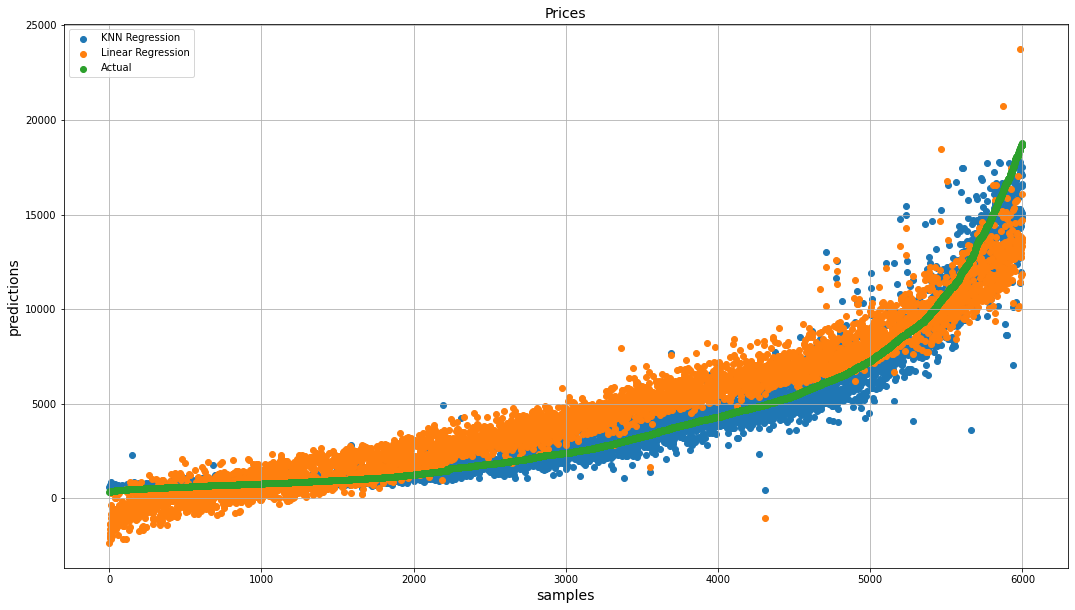

In [14]:
# plot
regressor = KNNRegression()
regressor.train(X_train, Y_train)
dists = regressor.dist_matrix(X_test)
predicted_knn = regressor.do_regression(dists, k=5)
predicted_linear = linear_reg.predict(X_test)
xx = np.linspace(1,X_test.shape[0], X_test.shape[0])

perm = Y_test.argsort()
Y_test_sorted = np.sort(Y_test)    # Sort the Y_test Prices
predicted_knn = predicted_knn[perm] # shuffle the array in accordance with Y_test
predicted_linear = predicted_linear[perm]

plt.figure(figsize=(18,10))
plt.scatter(xx, predicted_knn, marker='o')
plt.scatter(xx, predicted_linear, marker='o')
plt.scatter(xx, Y_test_sorted, marker='o')
plt.title('Prices', fontsize=14)
plt.xlabel('samples', fontsize=14)
plt.ylabel('predictions', fontsize=14)
plt.legend(['KNN Regression', 'Linear Regression', 'Actual'])
plt.grid(True)
plt.show()

#**KNN Classifier**

In this problem you are required to train, test and validate a K-Nearest Neighbor Classifier on the famous CIFAR-10 dataset. The next few cells will guide you through the process. Follow along...

In [15]:
# Run some setup code for this notebook.

import random
import numpy as np
import matplotlib.pyplot as plt
import os


from __future__ import print_function

from builtins import range
from six.moves import cPickle as pickle
from imageio import imread
import platform

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [ ]:
# Download the dataset
!wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz -O cifar-10-python.tar.gz
!tar -xzvf cifar-10-python.tar.gz
!rm cifar-10-python.tar.gz

In [ ]:
# This cell loads the training and testing dataset. Please note the variables at
# the end of the cell as you would require them to access the train/test data 
# and labels throughout the assignment
def load_pickle(f):
    version = platform.python_version_tuple()
    if version[0] == '2':
        return  pickle.load(f)
    elif version[0] == '3':
        return  pickle.load(f, encoding='latin1')
    raise ValueError("invalid python version: {}".format(version))
  
def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = load_pickle(f)
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
        Y = np.array(Y)
        return X, Y

def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte


cifar10_dir = 'cifar-10-batches-py'

# Cleaning up variables to prevent loading data multiple times
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Next we visualize the CIFAR-10 dataset. Although these functions are being written for you, we highly recommend you go through the code and make yourself familiar as these are things you will be required to do very often when working on AI/ML projects

In [ ]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In the next cell we flatten each image into a single dimensional vector so that it is easy to process. You should be able to reason about the dimensions comfortable.

In [ ]:
# Subsample the data for more efficient code execution in this exercise
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

In the next cell you are going to implement the main KNearestNeighbor class and keep adding functions to it as and when required in the subsequent steps.

In [1]:
# You will keep coming back to this cell to add more functions as and when
# required. Right now it is very simple!
class KNearestNeighbor:
    ''' L2 distance is used '''
    def __init__(self):
        self.data = None
        self.Y = None
    
    def train(self, data, Y):
        self.data = data  # numpy array of two dimension, storing samples along axis=0
        self.Y = Y  # numpy array of one dimension

    def give_dist(self, X, Y, p=2):
        dist = np.sum(np.abs(X - Y) ** p)
        if p == 2:
            return math.sqrt(dist)
        else:
            return dist
    
    def dist_matrix_two_loops(self, X_test):
        num_test = X_test.shape[0]
        num_train = self.data.shape[0]
        dist_mat = []
        for i in range(num_test):
            temp = []
            for j in range(num_train):
                dist = self.give_dist(self.data[j, :], X_test[i, :])
                temp.append(dist)
            dist_mat.append(temp)
        return dist_mat
    
    def dist_matrix_one_loop(self, X_test):
        num_test = X_test.shape[0]
        num_train = self.data.shape[0]
        dist_mat = np.zeros((num_test, num_train))
        for i in range(num_test):
            dist_mat[i, :] = np.sum((self.data - X_test[i, :]) ** 2, axis=1)
        return dist_mat
    
    def dist_matrix(self, X):
        dists = -2 * np.dot(X, self.data.T) + np.sum(self.data**2, axis=1) + np.sum(X**2, axis=1)[:, np.newaxis]
        return dists

    def predict_labels(self, dist_mat, k=2):
        indices = np.argpartition(dist_mat, k)
        indices = indices[:, :k]
        labels = np.take(self.Y, indices)
        prediction = []
        for row in labels:
            values, counts = np.unique(row, return_counts=True)
            ind = np.argmax(counts)
            prediction.append(values[ind])
        return prediction

Go back to KNearestNeighbor class and add a method to train the classifier. Your function will be called as below. In KNN classifier, this step is a simple memorization of the training data.

In [ ]:
# Make sure to add train() in the classifier class before executing this cell
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)

Go back to KNearestNeighbor class and add a method to compute distances between each pair of test image and train image. You can use two loops to do this. Remember we are using standard L-2 distance metric. Precisely your method should return a distance matrix($D$) where $D(i,j)$ = **L-2** distance between the $i^{th}$ test image and the $j^{th}$ train image. Your function will be called as below

In [ ]:
# Make sure to add compute_distances_two_loops() in the classifier class 
# before executing this cell
dists = classifier.dist_matrix(X_test)
print(dists.shape)

Next implement the function to predict labels. Again go back to the KNearestNeighbor class cell. Your function will be called as below

In [ ]:
# Make sure to add predict_labels() in the classifier class 
# before executing this cell
y_test_pred = classifier.predict_labels(dists, k=5)

# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

In [ ]:
# Use this cell to compute accuracies for k = 3, 5, 7
y_test_pred = classifier.predict_labels(dists, k=1)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f  k: %d' % (num_correct, num_test, accuracy, 1))

y_test_pred = classifier.predict_labels(dists, k=3)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f  k: %d' % (num_correct, num_test, accuracy, 3))

y_test_pred = classifier.predict_labels(dists, k=5)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f  k: %d' % (num_correct, num_test, accuracy, 5))

y_test_pred = classifier.predict_labels(dists, k=7)
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f  k: %d' % (num_correct, num_test, accuracy, 7))

Now we have a basic classifier ready but it is extremely inefficient. In Machine Learning writing vectorised code is one of the most important skills. 

Now you have to again go back to the KNearestNeighbor class cell and add functions to compute the distance matrix using:
1.   single loop
2.   no loops

From here onwards we won't do as much hand holding as done before. You are expected to write all the code from scratch




Next, you are required to tabulate the time taken to compute the distance matrix using each of the three above methods implemented for k = 1, 3, 5, 7.

In [ ]:
# Use this cell to present your timing results for computing distance matrix
import time
k_val = [1, 3, 5, 7]
zero_loop = []
one_loop = []
two_loop = []
for loop in range(3):
    for k in k_val:
        if loop == 0:
            t_s = time.time()
            dists = classifier.dist_matrix(X_test)
            y_test_pred = classifier.predict_labels(dists, k)
            t_f = time.time()
            zero_loop.append(t_f - t_s)
        elif loop == 1:
            t_s = time.time()
            dists = classifier.dist_matrix_one_loop(X_test)
            y_test_pred = classifier.predict_labels(dists, k)
            t_f = time.time()
            one_loop.append(t_f - t_s)
        else:
            t_s = time.time()
            dists = classifier.dist_matrix_two_loops(X_test)
            y_test_pred = classifier.predict_labels(dists, k)
            t_f = time.time()
            two_loop.append(t_f - t_s)

In [ ]:
plt.style.use('ggplot')
plt.plot(k_val, zero_loop, marker='o')
plt.plot(k_val, one_loop, marker='o')
plt.plot(k_val, two_loop, marker='o')
plt.title('time taken for matrix computation Vs k values', fontsize=14)
plt.xlabel('k value', fontsize=14)
plt.ylabel('time taken', fontsize=14)
plt.legend(['no loop', 'one loop', 'two loops'])
plt.grid(True)
plt.show()
print('Using no loops is around 200 times faster than using 2 loops')

As you can see that in KNN algorithm it is important to tune the hyperparameter K. We will do this using Cross Validation Leave One Out approach. The idea is to split the train set into few folds(here we recommend you to set the fold number to 5). Then, for each value of K, we leave one of these folds out to evaluate performance but use the others to train. Repeat this by leaving each fold out once. You will get 5 accuracies in this case, one for leaving out each fold. Depending on the average accuracy decide on the optimal value of K. Report the same. We also expect you to present plots showing the average accuracy and standard deviation for each value of K.

In [ ]:
# Use this cell to implement Cross Validation

XX = np.vstack((X_train, X_test))  # stacking the train and test data together 
YY = np.append(y_train, y_test)    # stacking the labels as well
rows = XX.shape[0]
num = rows // 5
batches = np.vsplit(XX, 5)         # split into 5 groups
Y = np.zeros(rows).reshape(5, num) # same for Y
for i in range(5):
    Y[i, :] = np.array(YY[i*num: (i+1)*num])
    
k_values = np.array([1, 3, 5, 7, 23, 27, 39, 73, 117, 177, 233, 257, 297, 333])
mean_accuracy = []
for k in k_values:
    accuracies = []
    for i in range(5):
        x_test = batches[i]
        y_test = Y[i]
        if i == 0:
            curr_X = np.vstack((batches[1], batches[2], batches[3], batches[4]))
            curr_Y = np.vstack((Y[1], Y[2], Y[3], Y[4]))
        elif i == 1:
            curr_X = np.vstack((batches[0], batches[2], batches[3], batches[4]))
            curr_Y = np.vstack((Y[0], Y[2], Y[3], Y[4]))
        elif i == 2:
            curr_X = np.vstack((batches[0], batches[1], batches[3], batches[4]))
            curr_Y = np.vstack((Y[0], Y[1], Y[3], Y[4]))
        elif i == 3:
            curr_X = np.vstack((batches[0], batches[1], batches[2], batches[4]))
            curr_Y = np.vstack((Y[0], Y[1], Y[2], Y[4]))
        else:
            curr_X = np.vstack((batches[0], batches[1], batches[2], batches[3]))
            curr_Y = np.vstack((Y[0], Y[1], Y[2], Y[3]))

        classifier.train(curr_X, curr_Y)
        dists = classifier.dist_matrix(x_test)
        y_test_pred = classifier.predict_labels(dists, k)
        num_correct = np.sum(y_test_pred == y_test)
        accuracy = float(num_correct) / num
        accuracies.append(accuracy)

    accuracies = np.array(accuracies)
    acc = np.mean(accuracies)
    mean_accuracy.append(acc)     # append the mean accuracy

In [ ]:
# Plot
plt.style.use('ggplot')
plt.plot(k_values, mean_accuracy, marker='o')
plt.title('mean accuracy Vs k values', fontsize=14)
plt.xlabel('k value', fontsize=14)
plt.ylabel('mean accuracy', fontsize=14)
plt.grid(True)
plt.show()